In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px
import os
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [15]:
# ids = ['f_4', 'f_13', 'f_23', 'f_17'] 
ids = ['f_4'] 

In [16]:
models_dir = '../../../models/top3freeze/'

# Create an empty dictionary to store the loaded models
loaded_models = {}

for id in ids:
    model_path = os.path.join(models_dir, f'{id}.h5')
    if os.path.exists(model_path):
        loaded_models[id] = tf.keras.models.load_model(model_path)
        print(f'Loaded model {id}')
    else:
        print(f"No model found for id {id}")

Loaded model f_4


# Functions

In [17]:
# data_dir = '../dataset/realworld_test_data/processed/version1/'
# data_dir = '../../../dataset/realworld_test_data/processed/version2/'
data_dir = '../../../dataset/realworld_test_data/processed/merge_clean_v12/'

IMAGE_SIZE = 300
class_names = sorted(os.listdir(data_dir))
n_classes = len(class_names)

print(f"Total number of classes in train: {n_classes}")
print(f"Classes: {class_names}")

Total number of classes in train: 20
Classes: ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']


In [18]:
def load_and_preprocess_image(image, label):
    # Resize the image to the desired size
    image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])
    
    # Rescale pixel values to be in the range [0, 1]
    image = tf.image.per_image_standardization(image)
    
#     # Convert image data type to tf.float32
#     image = tf.cast(image, tf.float32)
    
    return image, label

In [19]:
def plot_images(dataset: tf.data.Dataset, n_rows: int = 5, n_cols: int = 4, class_names=class_names, model=None, check=False, verbose=1):
    """
    Plots a grid of images and their corresponding labels from a tf.data.Dataset object.

    Args:
        dataset (tf.data.Dataset): A TensorFlow dataset object containing the images and labels to plot.
        n_rows (int): Number of rows in the plot grid. Default is 5.
        n_cols (int): Number of columns in the plot grid. Default is 4.
        class_names (list): A list of strings mapping the integer labels to their corresponding class names. Default is None.
        figsize (tuple): A tuple specifying the size of the figure. Default is (20, 20).
        model (tf.keras.Model): A trained TensorFlow model to make predictions on the images. Default is None.
        check (bool): If True and a model is provided, only incorrectly predicted images will be plotted. Default is False.
    """
    
    # Create a figure to display the images
    fig = plt.figure(figsize=(n_cols*5, n_rows*5))
    
    # Initialize image counter
    image_count = 0
    
    # Loop over all batches in dataset
    for images, labels in dataset:
        
        # Loop over all images in batch
        for i in range(images.shape[0]):
            
            label = int(labels[i].numpy())
            title = "true: "+class_names[label]

            if model:
                pred = model.predict(images[i][np.newaxis], verbose=verbose)

                if check:
                    if label == np.argmax(pred):
                        continue

                pred_label = f"Pred: {np.argmax(pred)}"
                pred_percentage = f" ({np.max(pred) * 100:.2f}%)"
                if class_names:
                    pred_label += f" ({class_names[np.argmax(pred)]})"
                title += f"\n{pred_label} {pred_percentage}"

            # Create a subplot for each image
            ax = fig.add_subplot(n_rows, n_cols, image_count+1)    

            # Plot the image
            ax.imshow(images[i].numpy().astype("uint8"))

            # Set the title to the corresponding label
            ax.set_title(title)

            # Remove the axis ticks
            ax.set_xticks([])
            ax.set_yticks([])
            
            # Increment image counter
            image_count += 1
            
            # Check if maximum number of images has been reached
            if image_count >= n_rows * n_cols:
                break
        
        # Check if maximum number of images has been reached
        if image_count >= n_rows * n_cols:
            break
    
    # Show the plot
    plt.show()

In [20]:
def plot_all_incorrect_predictions(dataset: tf.data.Dataset, n_cols: int = 4, class_names=class_names, model=None, verbose=1):
    """
    Plots a grid of images and their corresponding labels from a tf.data.Dataset object.

    Args:
        dataset (tf.data.Dataset): A TensorFlow dataset object containing the images and labels to plot.
        n_cols (int): Number of columns in the plot grid. Default is 4.
        class_names (list): A list of strings mapping the integer labels to their corresponding class names. Default is None.
        figsize (tuple): A tuple specifying the size of the figure. Default is (20, 20).
        model (tf.keras.Model): A trained TensorFlow model to make predictions on the images. Default is None.
        verbose (int): Verbosity mode, 0 or 1. Default is 1.
    """
    
    # Initialize image counter
    image_count = 0
    
    # Loop over all batches in dataset
    for images, labels in dataset:
        
        # Loop over all images in batch
        for i in range(images.shape[0]):
            
            label = int(labels[i].numpy())
            title = "true: "+class_names[label]

            if model:
                pred = model.predict(images[i][np.newaxis], verbose=verbose)

                # If the prediction is correct, skip this image
                if label == np.argmax(pred):
                    continue

                pred_label = f"Pred: {np.argmax(pred)}"
                pred_percentage = f" ({np.max(pred) * 100:.2f}%)"
                if class_names:
                    pred_label += f" ({class_names[np.argmax(pred)]})"
                title += f"\n{pred_label} {pred_percentage}"

            # Increment image counter
            image_count += 1
            
    # Calculate the number of rows needed
    n_rows = int(np.ceil(image_count / n_cols))
    
    # Create a figure to display the images
    fig = plt.figure(figsize=(20, n_rows * 5))
    
    # Reset image counter
    image_count = 0
    
    # Loop over all batches in dataset
    for images, labels in dataset:
        
        # Loop over all images in batch
        for i in range(images.shape[0]):
            
            label = int(labels[i].numpy())
            title = "true: "+class_names[label]

            if model:
                pred = model.predict(images[i][np.newaxis], verbose=verbose)

                # If the prediction is correct, skip this image
                if label == np.argmax(pred):
                    continue

                pred_label = f"Pred: {np.argmax(pred)}"
                pred_percentage = f" ({np.max(pred) * 100:.2f}%)"
                if class_names:
                    pred_label += f" ({class_names[np.argmax(pred)]})"
                title += f"\n{pred_label} {pred_percentage}"

            # Create a subplot for each image
            ax = fig.add_subplot(n_rows, n_cols, image_count+1)    

            # Plot the image
            ax.imshow(images[i].numpy().astype("uint8"))

            # Set the title to the corresponding label
            ax.set_title(title)

            # Remove the axis ticks
            ax.set_xticks([])
            ax.set_yticks([])
            
            # Increment image counter
            image_count += 1
    
    # Show the plot
    plt.show()

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def plot_confusion_m(y_true, y_pred, class_names=None, figsize=(15, 15)):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy*100:.2f}%")

    plt.figure(figsize=figsize)
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=class_names,
        yticklabels=class_names,
    )
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [22]:
# Calculate class distribution
class_dis = [len(os.listdir(data_dir + name)) for name in class_names]
# class_dis = [len(os.listdir(val_dir + name)) for name in class_names]
# class_dis = [len(os.listdir(test_dir + name)) for name in class_names]

# Visualize using interactive pie chart
pie_chart = px.pie(values=class_dis, names=class_names, color=class_names)
pie_chart.update_layout({'title':{'text':"Class Distribution"}})
pie_chart.show()

# Visualize using interactive bar chart
bar_chart = px.bar(y=class_dis, x=class_names, color=class_names)
bar_chart.show()

In [23]:
real_test_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir)
real_test_ds_mapped = real_test_ds.map(load_and_preprocess_image)
real_test_ds_mapped.prefetch(tf.data.AUTOTUNE)

Found 857 files belonging to 20 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
# plot_images(real_test_ds)

In [25]:
# plot_images(real_test_ds_mapped)

# Check Multiple Result

START predicting with model f_4 ...
==== CONFUSION MATRIX FOR MODEL f_4 ====
Accuracy: 91.48%


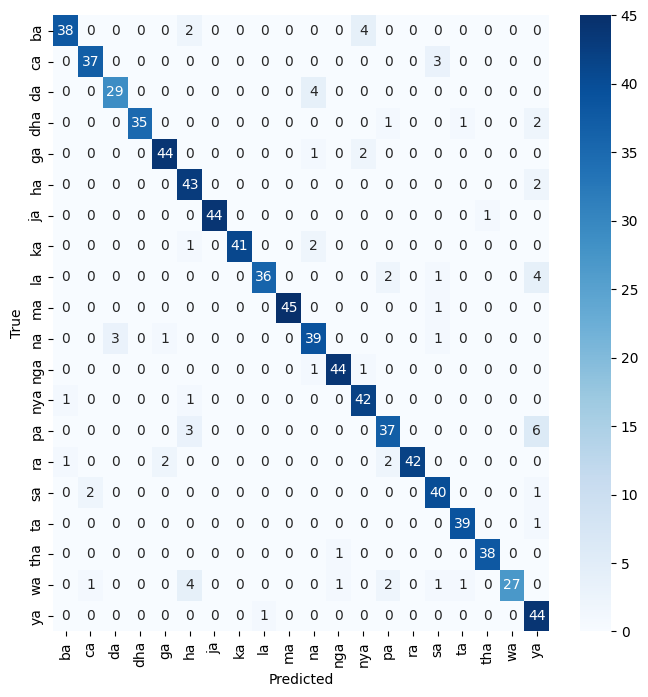

FINISHED predicting with model f_4 ... 



In [26]:
for id, model in loaded_models.items():
   
   print(f'START predicting with model {id} ...')
   
   y_pred = []  # store predicted labels
   y_true = []  # store true labels

   # iterate over the dataset
   for image_batch, label_batch in real_test_ds_mapped:   # use dataset.unbatch() with repeat
      # append true labels
      y_true.append(label_batch)
      # compute predictions
      preds = model.predict(image_batch, verbose=0)
      # append predicted labels
      y_pred.append(np.argmax(preds, axis = - 1))

   # convert the true and predicted labels into tensors
   correct_labels = tf.concat([item for item in y_true], axis = 0)
   predicted_labels = tf.concat([item for item in y_pred], axis = 0)

   print(f'==== CONFUSION MATRIX FOR MODEL {id} ====')
   plot_confusion_m(correct_labels, predicted_labels, class_names, figsize=(8,8))
   
   print(f'FINISHED predicting with model {id} ... \n')

# Check Single Result

START predicting with model f_4 ...
==== CONFUSION MATRIX FOR MODEL f_4 ====
Accuracy: 91.48%


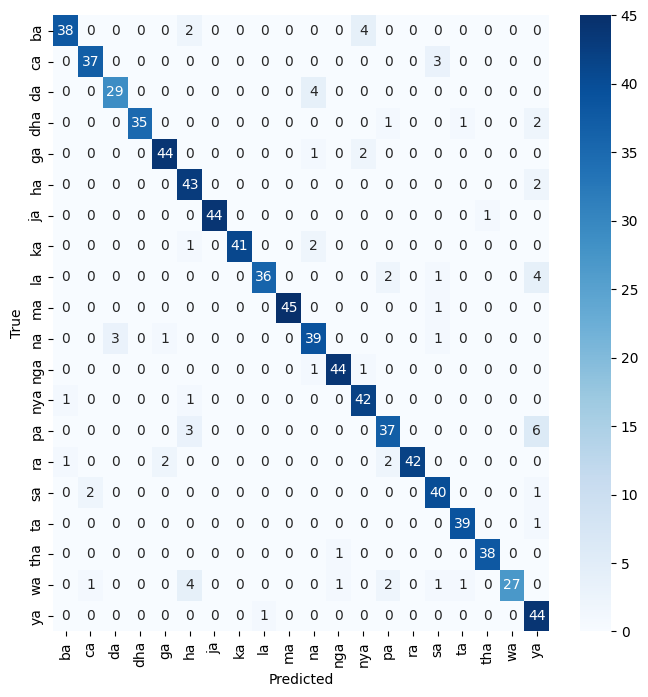

In [27]:
id = 'f_4'

print(f'START predicting with model {id} ...')

y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in real_test_ds_mapped:   # use dataset.unbatch() with repeat
    # append true labels
    y_true.append(label_batch)
    # compute predictions
    preds = loaded_models[id].predict(image_batch, verbose=0)
    # append predicted labels
    y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

print(f'==== CONFUSION MATRIX FOR MODEL {id} ====')
plot_confusion_m(correct_labels, predicted_labels, class_names, figsize=(8,8))

In [37]:
print(classification_report(correct_labels, predicted_labels, target_names=class_names))

              precision    recall  f1-score   support

          ba       0.95      0.86      0.90        44
          ca       0.93      0.93      0.93        40
          da       0.91      0.88      0.89        33
         dha       1.00      0.90      0.95        39
          ga       0.94      0.94      0.94        47
          ha       0.80      0.96      0.87        45
          ja       1.00      0.98      0.99        45
          ka       1.00      0.93      0.96        44
          la       0.97      0.84      0.90        43
          ma       1.00      0.98      0.99        46
          na       0.83      0.89      0.86        44
         nga       0.96      0.96      0.96        46
         nya       0.86      0.95      0.90        44
          pa       0.84      0.80      0.82        46
          ra       1.00      0.89      0.94        47
          sa       0.85      0.93      0.89        43
          ta       0.95      0.97      0.96        40
         tha       0.97    

CHECK GENEREAL PREDICTION
==== MODEL f_4 ====


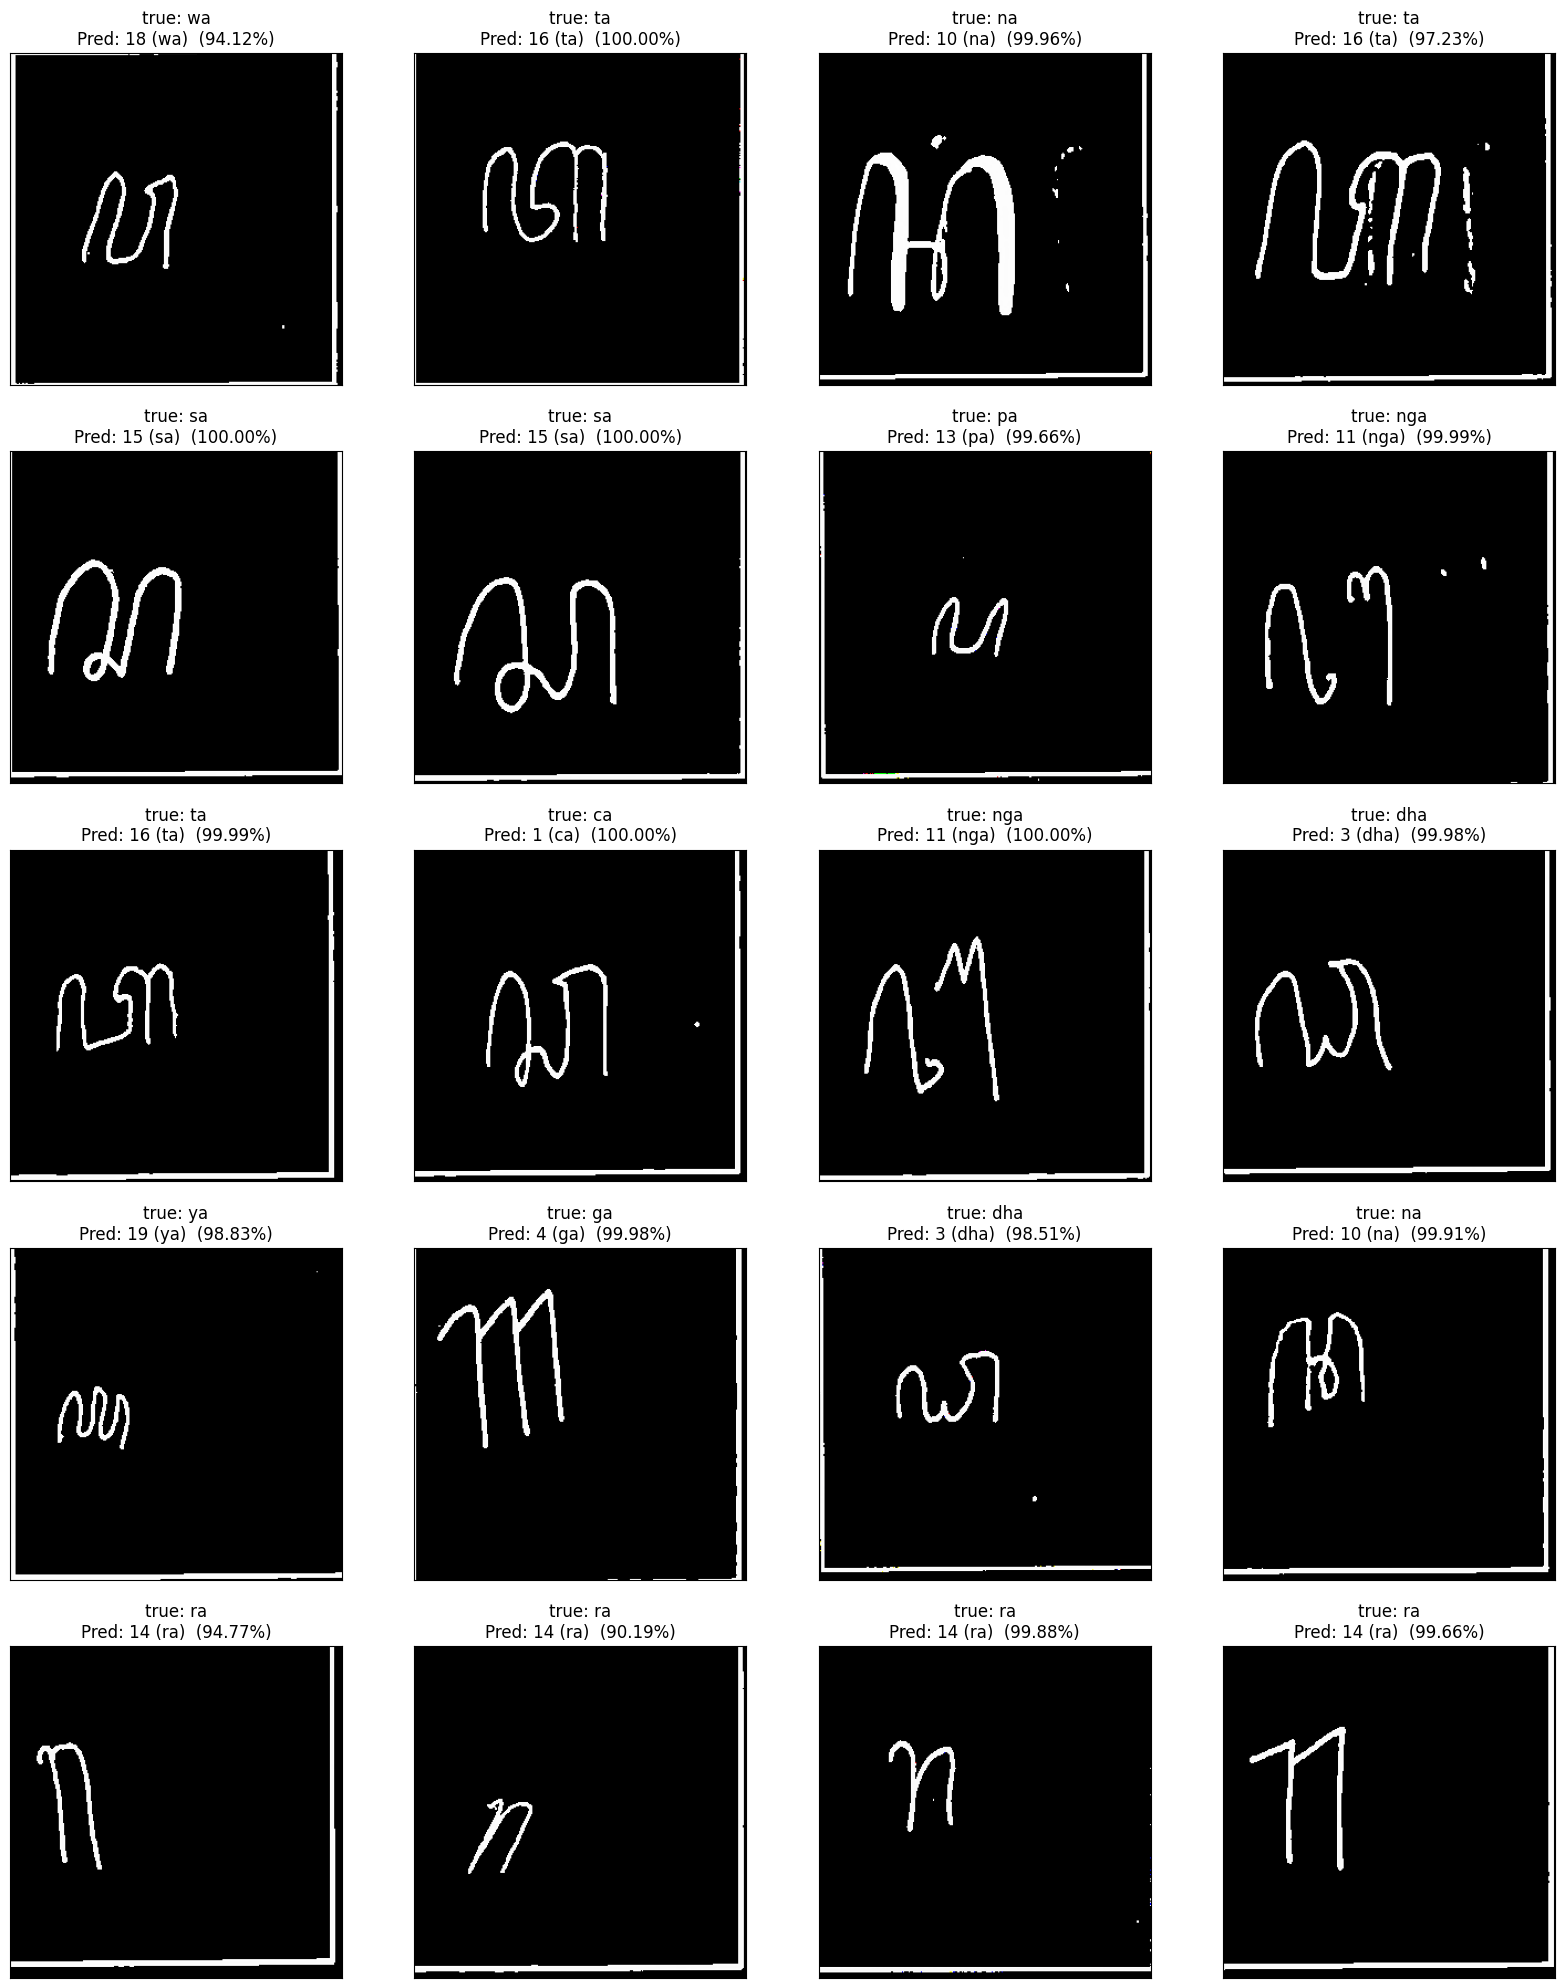

==== END MODEL f_4 ====




In [29]:
print('CHECK GENEREAL PREDICTION')
print(f'==== MODEL {id} ====')
plot_images(real_test_ds_mapped, model=loaded_models[id], verbose=0)
print(f'==== END MODEL {id} ====\n\n')

CHECK FEW FALSE PREDICTION
==== MODEL f_4 ====


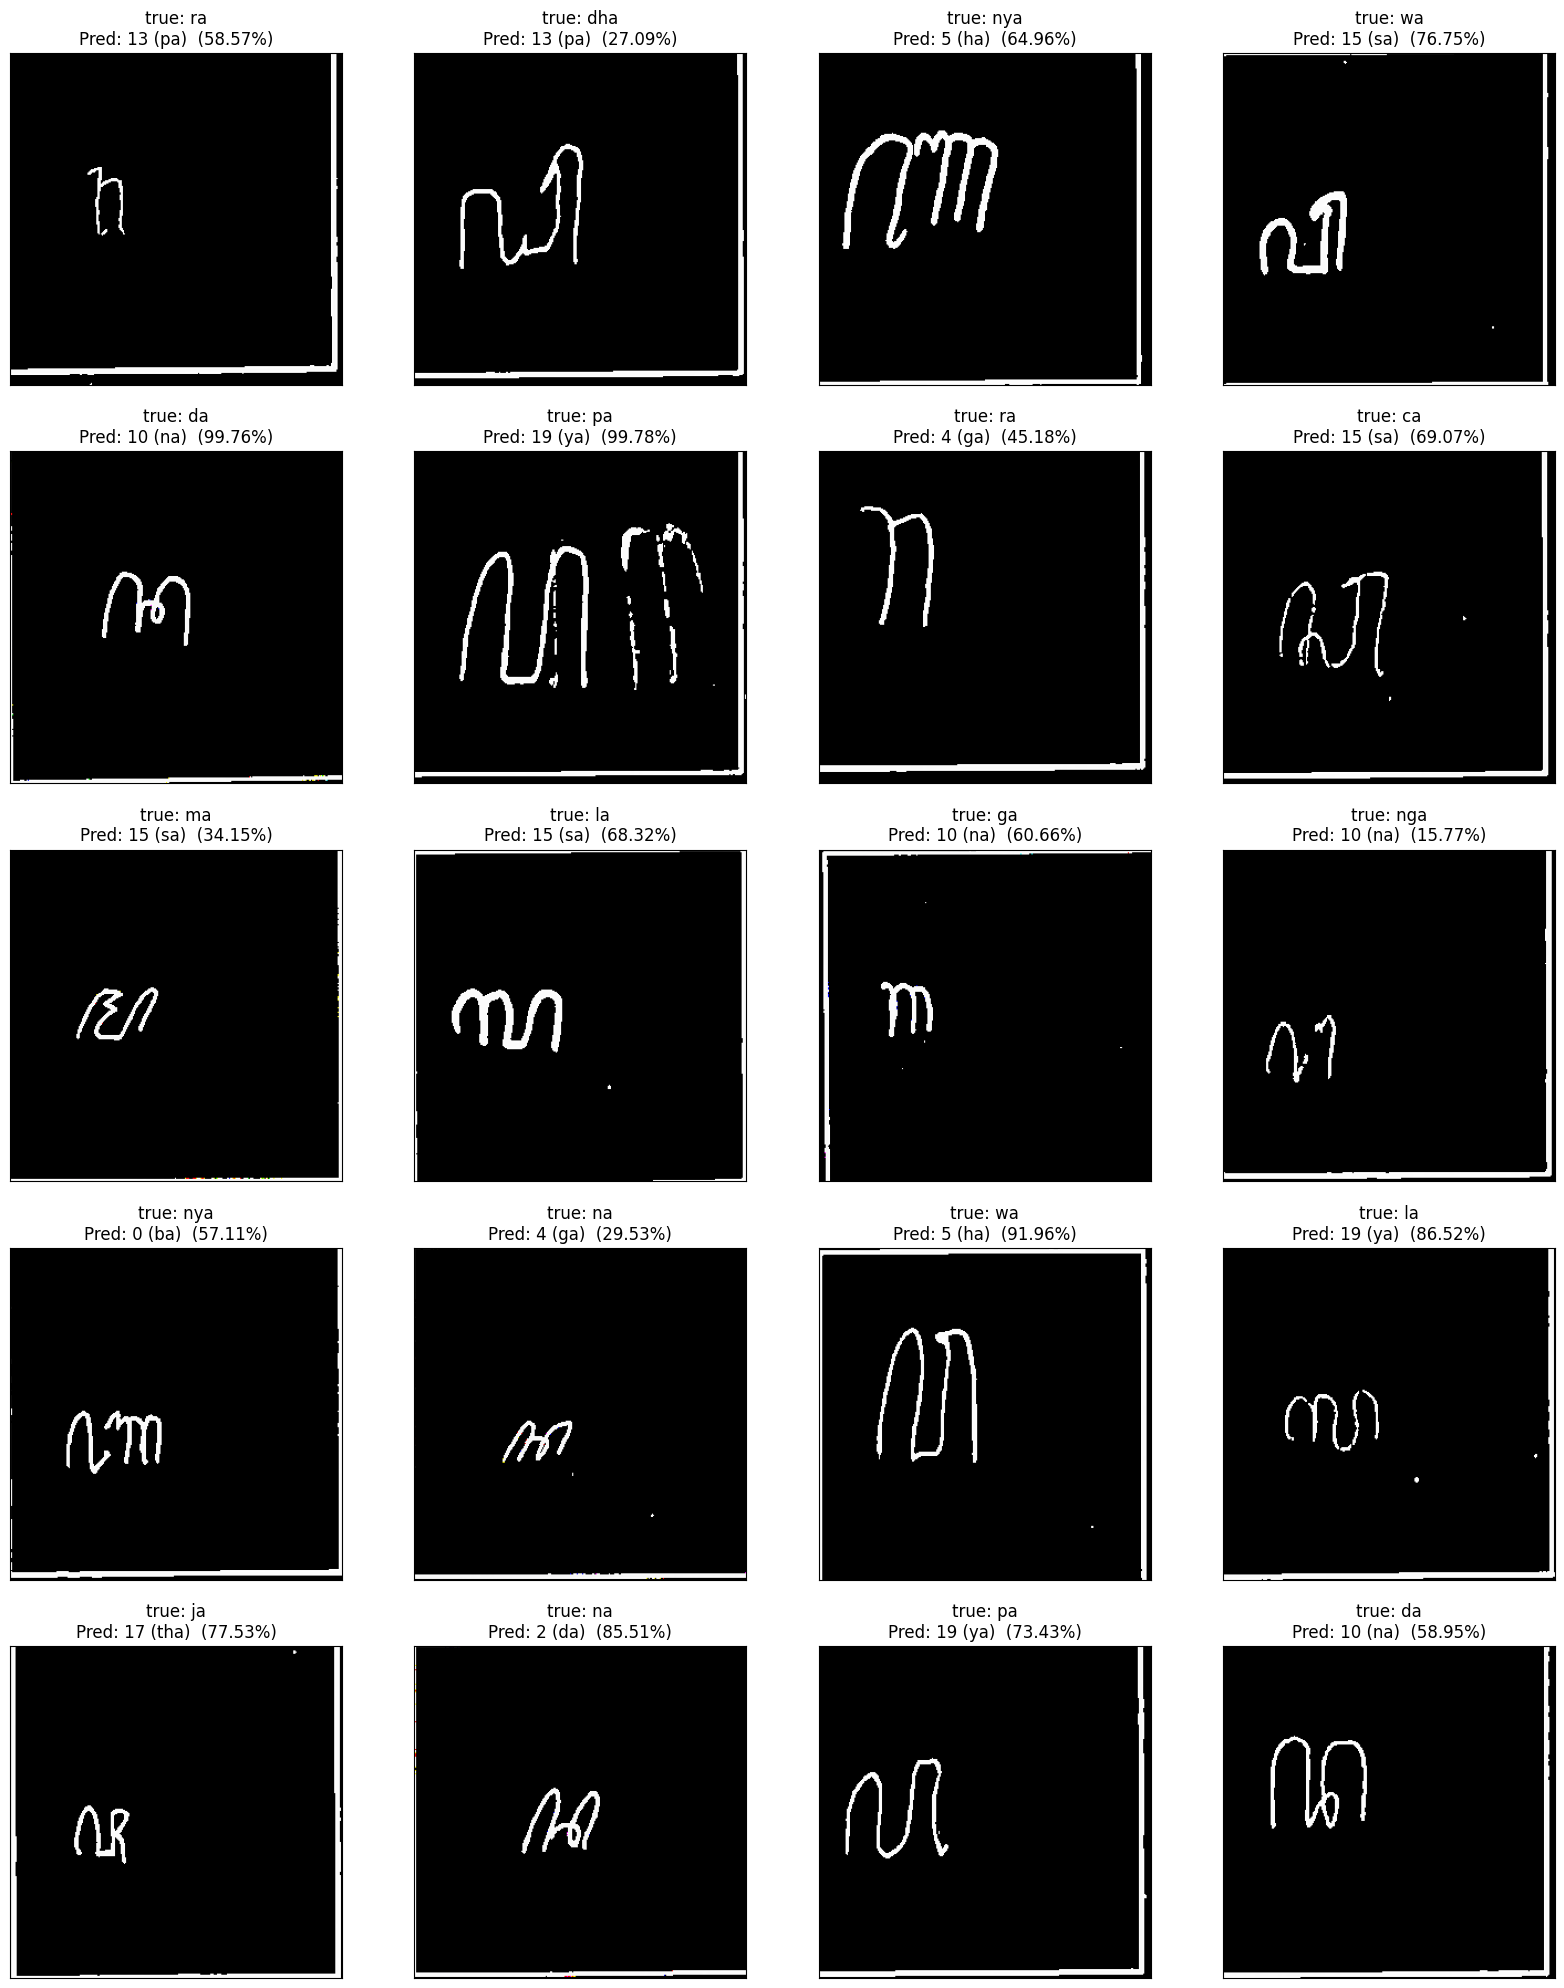

==== END MODEL f_4 ====




In [30]:
print('CHECK FEW FALSE PREDICTION')
print(f'==== MODEL {id} ====')
plot_images(real_test_ds_mapped, model=loaded_models[id], verbose=0, check=True)
print(f'==== END MODEL {id} ====\n\n')

In [31]:
# print('CHECK ALL FALSE PREDICTION')
# print(f'==== MODEL {id} ====')
# plot_all_incorrect_predictions(real_test_ds_mapped, model=loaded_models[id], verbose=0)
# print(f'==== END MODEL {id} ====\n\n')